## Problem Statement

Download the creditcard dataset from the following link:<br>https://github.com/AnjulaMehto/Sampling_Assignment/blob/main/Creditcard_data.csv <br>Convert this data-set into balanced class dataset. Create five samples.Apply five different sampling techniques ( Sampling1, Sampling2, Sampling3, 
Sampling4, Sampling5) on five different ML models (M1, M2, M3, M4 and M5).<br> Determine which sampling technique gives higher accuracy on which model. 

## Solution

### Libraries Used

In [8]:
import pandas as pd
from collections import Counter
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### Data 

In [3]:
data=pd.read_csv("G:/Creditcard_data.csv")
print(Counter(data['Class']))
data.head()

Counter({0: 763, 1: 9})


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


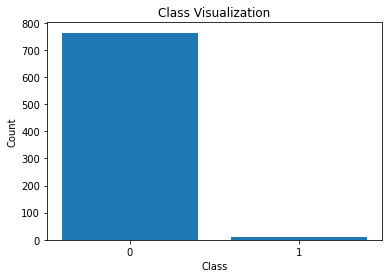

In [19]:
X=data.drop(['Class'],axis=1)
Y=data['Class']
X.head()
Y.head()
dict1=Counter(data['Class'])
dict1
zero_count=dict1[0]
zero_count
one_count=dict1[1]
one_count
list1=[0,1]
plt.bar(dict1.keys(),dict1.values())
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Visualization")
plt.xticks([0,1])
plt.show()

## Oversampling 

Here,in the given dataset,oversampling is done using SMOTE so as to balance the imbalanced dataset.(Synthetic Miniority Oversampling Technique is used to oversample the  miniority class).

In [23]:
smote=SMOTE(random_state=42)
x_smote,y_smote=smote.fit_resample(X,Y)
Counter(y_smote)
x_smote.head()
Counter(y_smote)

Counter({0: 763, 1: 763})

In [24]:
data=pd.concat([x_smote,y_smote],axis=1)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,233,-0.143424,0.517932,0.731111,0.129628,0.854012,0.001878,0.422518,0.075371,-0.127180,...,-0.086502,-0.238275,0.062436,-0.985098,-1.003529,-0.039215,0.158937,0.153083,0.992166,1
1522,288,-0.314860,0.491771,0.951783,0.141217,0.878564,-0.195386,0.522255,0.024692,-0.130443,...,-0.053105,-0.124739,-0.007566,-0.685670,-0.698822,-0.129806,0.101392,0.092159,0.993877,1
1523,465,-2.161259,-0.202359,0.365042,2.613566,0.923353,-0.447669,-2.330450,1.099415,-0.963817,...,0.471321,0.560975,-0.095592,-0.250085,-0.083285,0.508771,0.074280,-0.156735,0.726598,1
1524,516,-2.181198,-1.036044,1.153616,0.342333,1.069585,-0.553986,0.288244,0.069938,-0.076396,...,0.105787,0.020804,0.293645,-0.256581,-0.126499,0.109506,-0.313804,-0.241336,180.086978,1


In [25]:
data['normAmount'] = StandardScaler().fit_transform(np.array(data['Amount']).reshape(-1, 1))# normalising the amount column
data = data.drop(['Time', 'Amount'], axis = 1)# Dropping Time and Amount columns as they are not relevant for prediction purpose .
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.617566
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1,-0.306787
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,2.058484
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.453242
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.116605


## Models Used

Here we have used 5 ML models:
<br>
1.XGB Classifier
<br>
2.Random Forest Classifier
<br>
3.KNN
<br>
4.Extra Trees Classifier
<br>
5.SVM

#### 1. XGB Classifier

In [26]:
#Model 1-> XGB Classifier 
def xgb(x_train,y_train,x_test,y_test):
    model=XGBClassifier()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    return accuracy

#### 2.Random Forest Classifier

In [27]:
#Model 2-> Random Forest Classifier
def randomForest(x_train,y_train,x_test,y_test):
    model=RandomForestClassifier(n_estimators=200)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    return accuracy

#### 3.KNN

In [28]:
#Model 3->K Neighbors Classifier
def KNN(x_train,y_train,x_test,y_test):
    model=KNeighborsClassifier(n_neighbors=7)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    return accuracy

#### 4.Extra Trees Classifier

In [29]:
#Model 4->Extra Trees Classifier
def extraTrees(x_train,y_train,x_test,y_test):
    model=ExtraTreesClassifier(n_estimators=200)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    return accuracy

#### 5.SVM

In [30]:
#Model 5->SVC
def svmClassifier(x_train,y_train,x_test,y_test):
    model=SVC()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    return accuracy

## Sampling 

## Sampling Techniques Used

Here we have used 5 sampling techniques:
<br>
1.Simple Random Sampling
<br>
2.Systematic Sampling
<br>
3.Stratified Sampling
<br>
4.Cluster Sampling
<br>
5.Multi-Stage Sampling

#### 1.Simple Random Sampling 

In [31]:
#1.Random Sampling
noOfSamples=int((1.96*1.96*0.5*0.5)/(0.05*0.05))#Assumed Z=1.96,p=0.5 and E=0.05
print("Number of samples: ",noOfSamples)
random_sample1=data.sample(n=noOfSamples,random_state=2)
X1=random_sample1.drop(['Class'],axis=1)
Y1=random_sample1['Class']
Y1
X1
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.3,random_state=2)

Number of samples:  384


##### Accuracy

In [32]:
print("Accuracy of XGB Classifier: ",xgb(x_train,y_train,x_test,y_test))
print("Accuracy of Random Forest Classifier: ",randomForest(x_train,y_train,x_test,y_test))
print("Accuracy of KNN Classifier: ",KNN(x_train,y_train,x_test,y_test))
print("Accuracy of Extra Trees Classifier: ",extraTrees(x_train,y_train,x_test,y_test))
print("Accuracy of SVM Classifier: ",svmClassifier(x_train,y_train,x_test,y_test))

Accuracy of XGB Classifier:  0.9741379310344828
Accuracy of Random Forest Classifier:  1.0
Accuracy of KNN Classifier:  0.896551724137931
Accuracy of Extra Trees Classifier:  1.0
Accuracy of SVM Classifier:  0.9827586206896551


#### 2.Systematic Sampling

In [33]:
#2.Systematic Sampling
systematic_sample=data.iloc[::4]
systematic_sample
X2=random_sample1.drop(['Class'],axis=1)
Y2=random_sample1['Class']
Y2
X2
x_train1,x_test1,y_train1,y_test1=train_test_split(X2,Y2,test_size=0.3,random_state=20)

##### Accuracy

In [34]:
print("Accuracy of XGB Classifier: ",xgb(x_train1,y_train1,x_test1,y_test1))
print("Accuracy of Random Forest Classifier: ",randomForest(x_train1,y_train1,x_test1,y_test1))
print("Accuracy of KNN Classifier: ",KNN(x_train1,y_train1,x_test1,y_test1))
print("Accuracy of Extra Trees Classifier: ",extraTrees(x_train1,y_train1,x_test1,y_test1))
print("Accuracy of SVM Classifier: ",svmClassifier(x_train1,y_train1,x_test1,y_test1))

Accuracy of XGB Classifier:  0.9655172413793104
Accuracy of Random Forest Classifier:  0.9913793103448276
Accuracy of KNN Classifier:  0.9137931034482759
Accuracy of Extra Trees Classifier:  0.9913793103448276
Accuracy of SVM Classifier:  1.0


#### 3.Stratified Sampling 

In [38]:
#3. Stratified Sampling
noOfSamples=int((1.96*1.96*0.5*0.5*1*1)/(0.05*0.05))#Assumed Z=1.96,p=0.5 and E=0.05,S=1
print("Number of samples: ",noOfSamples)
# print(len(data))
zero_data=data.loc[data['Class']==0]
zero_data
zero_new_data=zero_data.sample(n=375,random_state=15)
zero_new_data
one_data=data.loc[data['Class']==1]
one_data
one_new_data=one_data.sample(n=375,random_state=15)
one_new_data
new_data=pd.concat([zero_new_data,one_new_data],axis=0)
new_data
X3=new_data.drop(['Class'],axis=1)
Y3=new_data['Class']
x_train2,x_test2,y_train2,y_test2=train_test_split(X3,Y3,test_size=0.3,random_state=2)

Number of samples:  384


##### Accuracy

In [39]:
print("Accuracy of XGB Classifier: ",xgb(x_train2,y_train2,x_test2,y_test2))
print("Accuracy of Random Forest Classifier: ",randomForest(x_train2,y_train2,x_test2,y_test2))
print("Accuracy of KNN Classifier: ",KNN(x_train2,y_train2,x_test2,y_test2))
print("Accuracy of Extra Trees Classifier: ",extraTrees(x_train2,y_train2,x_test2,y_test2))
print("Accuracy of SVM Classifier: ",svmClassifier(x_train2,y_train2,x_test2,y_test2))

Accuracy of XGB Classifier:  1.0
Accuracy of Random Forest Classifier:  1.0
Accuracy of KNN Classifier:  0.9422222222222222
Accuracy of Extra Trees Classifier:  1.0
Accuracy of SVM Classifier:  0.9644444444444444


#### 4.Cluster Sampling

In [43]:
#4.Cluster Sampling
clusters = []
cluster_sample= pd.DataFrame()
for i in range(10) :
    cluster = data.sample(n=100,ignore_index=True,random_state=i)
    clusters.append(cluster)
for i in range(5) :
    cluster_sample = pd.concat([cluster_sample,clusters[math.floor(random.random()*10)]])
cluster_sample
clusters
X4=cluster_sample.drop(['Class'],axis=1)
Y4=cluster_sample['Class']
x_train3,x_test3,y_train3,y_test3=train_test_split(X4,Y4,test_size=0.3,random_state=15)

##### Accuracy

In [44]:
print("Accuracy of XGB Classifier: ",xgb(x_train3,y_train3,x_test3,y_test3))
print("Accuracy of Random Forest Classifier: ",randomForest(x_train3,y_train3,x_test3,y_test3))
print("Accuracy of KNN Classifier: ",KNN(x_train3,y_train3,x_test3,y_test3))
print("Accuracy of Extra Trees Classifier: ",extraTrees(x_train3,y_train3,x_test3,y_test3))
print("Accuracy of SVM Classifier: ",svmClassifier(x_train3,y_train3,x_test3,y_test3))

Accuracy of XGB Classifier:  0.98
Accuracy of Random Forest Classifier:  0.9866666666666667
Accuracy of KNN Classifier:  0.9266666666666666
Accuracy of Extra Trees Classifier:  1.0
Accuracy of SVM Classifier:  0.9866666666666667


#### 5.Multi-Stage Sampling

In [45]:
#5. Multi-Stage Sampling
zero_data1=data.loc[data['Class']==0]
zero_data1
zero_new_data1=zero_data1.sample(n=375,random_state=15)
zero_new_data1
one_data1=data.loc[data['Class']==1]
one_data1
one_new_data1=one_data1.sample(n=375,random_state=15)
one_new_data1
new_data1=pd.concat([zero_new_data1,one_new_data1],axis=0)
new_data1
multi_stage_sample=new_data1.sample(n=500,random_state=31)
X4=multi_stage_sample.drop(['Class'],axis=1)
Y4=multi_stage_sample['Class']
x_train4,x_test4,y_train4,y_test4=train_test_split(X4,Y4,test_size=0.3,random_state=19)

##### Accuracy

In [46]:
print("Accuracy of XGB Classifier: ",xgb(x_train4,y_train4,x_test4,y_test4))
print("Accuracy of Random Forest Classifier: ",randomForest(x_train4,y_train4,x_test4,y_test4))
print("Accuracy of KNN Classifier: ",KNN(x_train4,y_train4,x_test4,y_test4))
print("Accuracy of Extra Trees Classifier: ",extraTrees(x_train4,y_train4,x_test4,y_test4))
print("Accuracy of SVM Classifier: ",svmClassifier(x_train4,y_train4,x_test4,y_test4))

Accuracy of XGB Classifier:  0.98
Accuracy of Random Forest Classifier:  0.9866666666666667
Accuracy of KNN Classifier:  0.8533333333333334
Accuracy of Extra Trees Classifier:  1.0
Accuracy of SVM Classifier:  0.9533333333333334


## Final Results

|                            | Simple Random Sampling| Systematic Sampling | Stratified Sampling | Cluster Sampling |Multi-Stage Sampling|
| ---------------------------| --------------------- | --------------------| --------------------| -----------------|--------------------| 
|XGB Classifier              |0.9741379310344828     |0.9655172413793104   |1.0                  |0.98              | 0.98               |
|Random Forest Classifier    |1.0                    |0.9913793103448276   |1.0                  |0.9866666666666667| 0.9866666666666667 |
|KNN Classifier              |0.896551724137931      |0.9137931034482759   |0.9422222222222222   |0.9266666666666666| 0.8533333333333334 |
|Extra Trees Classifier      |1.0                    |0.9913793103448276   |1.0                  |1.0               | 1.0                |
|SVM Classifier              |0.9827586206896551     |1.0                  |0.9644444444444444   |0.9866666666666667| 0.9533333333333334 |

## Conclusion

According to the results:-
<br>
1.Simple Random Sampling gives higher accuracy when Random Forest Classifier and Extra Trees Classifier is used.
<br>
2.Systematic Sampling gives higher accuracy when SVM Classifier is used.
<br>
3.Stratified Sampling gives higher accuracy when XGB Classifier,Random Forest Classifier and Extra Trees Classifier are used.
<br>
4.Cluster Sampling gives higher accuracy when Extra Trees Classifier are used.
<br>
5.Multi-Stage Sampling gives higher accuracy when Extra Trees Classifier is used.